In [1]:
%cd /home/mrearle/repos/VLN-HAMT

/mnt-homes/kraken/mrearle/repos/VLN-HAMT


In [2]:
import h5py

In [7]:
with h5py.File('datasets/R2R/features/pth_vit_base_patch16_224_objects.hdf5', 'r') as f:
    print(f['17DRP5sb8fy']['00ebbf3782c64d74aaf7dd39cd561175']['features'][:, 1])

[-1.8253719   0.6564395  -1.66395     0.20561028  0.6564395   0.6564395
  0.6564395  -0.87404114 -1.1706527  -0.7850496  -0.24134387  0.6564395 ]


In [2]:
WIDTH = 224
HEIGHT = 224

In [3]:
import sys
p = '/home/mrearle/repos/VLN-HAMT/mattersim_build'
if p not in sys.path:
    sys.path.append(p)

In [4]:
import MatterSim
import json
import math
from collections import defaultdict
import numpy as np
from PIL import Image
object_metadata_file = "/home/mrearle/storage/img_features/object_vfov_annotations_vfov_clustered.json"

In [5]:
def get_objs():
    with open(object_metadata_file, 'r') as f:
            object_dict = json.load(f)

    data = defaultdict(lambda *_: defaultdict(list))
    for obj_dict_list in object_dict.values():
        for obj_dict in obj_dict_list:
            data[obj_dict['scan']][obj_dict['viewpoint']].append(obj_dict)

    for scan, viewpoints_dict in data.items():
        for viewpoint, objs in viewpoints_dict.items():
            for obj in objs:
                yield obj

In [6]:
def build_simulator(connectivity_dir, scan_dir, vfov):
    HEIGHT = 224
    WIDTH = 224
    sim = MatterSim.Simulator()
    sim.setNavGraphPath(connectivity_dir)
    sim.setDatasetPath(scan_dir)
    sim.setCameraResolution(WIDTH, HEIGHT)
    sim.setCameraVFOV(vfov)
    # sim.setDiscretizedViewingAngles(True)
    # sim.setDepthEnabled(False)
    # sim.setPreloadingEnabled(False)
    # sim.setBatchSize(1)
    sim.initialize()
    return sim

In [7]:
def visualize_img(scan, viewpoint, heading, elevation, vfov, connectivity_dir, scan_dir):
    HEIGHT = 224
    WIDTH = 224

    sim = MatterSim.Simulator()
    sim.setNavGraphPath(connectivity_dir)
    sim.setDatasetPath(scan_dir)
    sim.setCameraResolution(WIDTH, HEIGHT)
    sim.setCameraVFOV(vfov)
    sim.initialize()
    sim.newEpisode([scan], [viewpoint], [heading], [elevation])
    state = sim.getState()
    im = state[0].rgb
    im = np.array(im)
    return im[..., ::-1]

def visualize_img_sim(scan, viewpoint, heading, elevation, sim):
    sim.newEpisode([scan], [viewpoint], [heading], [elevation])
    state = sim.getState()
    im = state[0].rgb
    im = np.array(im)
    return im[..., ::-1]

In [8]:
import matplotlib.pyplot as plt

In [9]:
conncetivity_dir = '/home/mrearle/repos/VLN-HAMT/datasets/R2R/connectivity'
dataset_dir = '/home/mrearle/datasets/Matterport3DSimulator/data_v2/v1/scans/'

In [10]:
getter = get_objs()

In [11]:
obj = next(getter)

['17DRP5sb8fy', '10c252c90fa24ef3b698c6f54d984c5c', 0.32849996130484577, -0.11725220157383849, 0.7]
[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


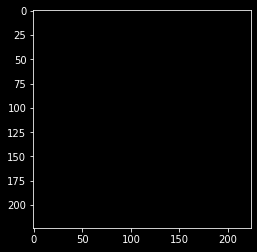

In [15]:
scan, viewpoint, heading, elevation, vfov = obj['scan'], obj['viewpoint'], obj['heading'], obj['elevation'], obj['vfov']

sim = build_simulator(
    conncetivity_dir,
    dataset_dir,
    vfov
)
print([scan, viewpoint, heading, elevation, obj['vfov']])
im = visualize_img_sim(scan, viewpoint, heading, elevation, sim)
# sim.newEpisode([scan], [viewpoint], [heading], [elevation])
# state = sim.getState()
# im = state[0].rgb
# im = np.array(im)
# im = im[..., ::-1]
print(im)
# sim.newEpisode([scan], [viewpoint], [heading], [elevation])
# state = sim.getState()
# image = state[0].rgb
# image = np.array(image) # in BGR channel
# image = image[..., ::-1] # in RGB channel
# image = Image.fromarray(image[:, :, ::-1]) #cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(im)
plt.show()

['17DRP5sb8fy', '10c252c90fa24ef3b698c6f54d984c5c', 0.32849996130484577, -0.11725220157383849, 0.7]
[[[ 97  86  68]
  [ 97  86  68]
  [ 96  85  67]
  ...
  [114  95  78]
  [113  94  77]
  [112  95  77]]

 [[ 97  86  68]
  [ 97  86  68]
  [ 97  86  68]
  ...
  [115  97  77]
  [115  97  77]
  [113  96  78]]

 [[ 98  87  69]
  [ 98  87  69]
  [ 97  86  69]
  ...
  [116  98  78]
  [116  98  78]
  [114  97  79]]

 ...

 [[ 60  52  40]
  [ 55  46  36]
  [ 46  38  27]
  ...
  [157 159 162]
  [138 142 146]
  [124 128 133]]

 [[ 54  46  35]
  [ 45  36  27]
  [ 35  26  17]
  ...
  [186 186 186]
  [184 184 183]
  [187 185 183]]

 [[ 43  35  25]
  [ 37  28  19]
  [ 38  29  20]
  ...
  [101 101 101]
  [101 101 100]
  [104 103 100]]]


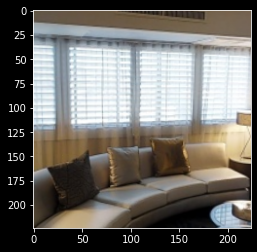

In [16]:
scan, viewpoint, heading, elevation, vfov = obj['scan'], obj['viewpoint'], obj['heading'], obj['elevation'], obj['vfov']
print([scan, viewpoint, heading, elevation, vfov])
image = visualize_img(scan, viewpoint, heading, elevation, vfov, conncetivity_dir, dataset_dir)
print(image)
plt.imshow(image)
plt.show()

In [26]:
image

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [21]:
[obj['scan']], [obj['viewpoint']], [obj['heading']], [obj['elevation']], obj['vfov']

(['17DRP5sb8fy'],
 ['10c252c90fa24ef3b698c6f54d984c5c'],
 [0.32849996130484577],
 [-0.11725220157383849],
 0.7)